In [1]:
import matplotlib 
import pandas as pd

%matplotlib inline

In [2]:
from datetime import datetime
import base

In [87]:
# -*- coding: utf-8 -*-
import httplib
import traceback
import urllib

HTTP_OK = 200
HTTP_AUTHORIZATION_ERROR = 401
TOKEN = '20353207bd1bb251c0512ffa4a4fc28de0f6bf16bbdb41c89cb2b4ab8c458551'


class Client:
    domain = 'api.wmcloud.com'
    port = 443
    token = ''
    httpClient = None
    def __init__( self ):
        self.httpClient = httplib.HTTPSConnection(self.domain, self.port)
    def __del__( self ):
        if self.httpClient is not None:
            self.httpClient.close()
    def encodepath(self, path):
        #转换参数的编码
        start=0
        n=len(path)
        re=''
        i=path.find('=',start)
        while i!=-1 :
            re+=path[start:i+1]
            start=i+1
            i=path.find('&',start)
            if(i>=0):
                for j in range(start,i):
                    if(path[j]>'~'):
                        re+=urllib.quote(path[j])
                    else:
                        re+=path[j]
                re+='&'
                start=i+1
            else:
                for j in range(start,n):
                    if(path[j]>'~'):
                        re+=urllib.quote(path[j])
                    else:
                        re+=path[j]
                start=n
            i=path.find('=',start)
        return re

    def init(self, token):
        self.token=token

    def getData(self, path):
        result = None
        path='/data/v1'+path
        path=self.encodepath(path)
        try:
            #set http header here
            self.httpClient.request('GET', path, headers = {"Authorization": "Bearer " + self.token})
            #make request
            response = self.httpClient.getresponse()
            #read result
            if response.status == HTTP_OK:
                #parse json into python primitive object
                result = response.read()
            else:
                result = response.read()
            if(path.find('.csv?')!=-1):
                result=result.decode('GB2312').encode('utf-8')
            return response.status, result
        except Exception, e:
            #traceback.print_exc()
            raise e
        return -1, result



# -*- coding: utf-8 -*-
from datetime import *
import pandas as pd
import json

def getFactorData(ticker, field, beginDate='', endDate='') :
    try:
        client = Client()
        client.init(TOKEN)
        field = field + ',tradeDate'
        url1='/api/market/getStockFactorsDateRange.json?field={field}&secID={secID}&ticker={ticker}&beginDate={beginDate}&endDate={endDate}'\
            .format(field=field, secID = '', ticker=ticker, beginDate=beginDate.strftime('%Y%m%d'), endDate=endDate.strftime('%Y%m%d'))
        code, result = client.getData(url1)
        if code==200:
            result = json.loads(result)
            df = pd.DataFrame(result['data'])
            df['tradeDate'] = pd.to_datetime(df['tradeDate'])
            df.rename(columns={'tradeDate':'date'}, inplace=True)
            df.set_index('date', inplace=True)
            return df
        else:
            print code
            print result

            return None

    except Exception, e:
        #traceback.print_exc()
        raise e

        
def getFundamental(form, ticker,field, beginDate=None, endDate=None) :
    try:
        client = Client()
        client.init(TOKEN)
        if field == '':
            field = ''
        else:
            field = field + ',endDate'

        if beginDate is None :
            beginDate_str = ''
        else :
            beginDate_str = beginDate.strftime('%Y%m%d')

        if endDate is None :
            endDate_str = ''
        else :
            endDate_str = endDate.strftime('%Y%m%d')
        url1='/api/fundamental/{form}?secID={secID}&ticker={ticker}&beginDate={beginDate}&endDate={endDate}&field={field}&reportType='\
            .format(form=form, field=field, secID='', ticker=ticker, beginDate=beginDate_str, endDate=endDate_str)
        print url1

        code, result = client.getData(url1)
        if code==200:
            print code
            result = json.loads(result)
            df = pd.DataFrame(result['data'])
            df['endDate'] = pd.to_datetime(df['endDate'])
            df.rename(columns={'endDate':'date'}, inplace=True)
            df.set_index('date', inplace=True)
            return df
        else:
            print code
            print result

            return None

    except Exception, e:
        #traceback.print_exc()
        raise e


def getMarketEqu(ticker,field, beginDate='', endDate='') :
    try:
        client = Client()
        client.init(TOKEN)
        field = field + ',tradeDate'
        url1='/api/market/getMktEqud.json?field={field}&secID={secID}&ticker={ticker}&beginDate={beginDate}&endDate={endDate}'\
            .format(field=field, secID = '', ticker=ticker, beginDate=beginDate.strftime('%Y%m%d'), endDate=endDate.strftime('%Y%m%d'))
        code, result = client.getData(url1)
        if code==200:
            result = json.loads(result)
            df = pd.DataFrame(result['data'])
            df['tradeDate'] = pd.to_datetime(df['tradeDate'])
            df.rename(columns={'tradeDate':'date'}, inplace=True)
            df.set_index('date', inplace=True)
            return df
        else:
            print code
            print result

            return None

    except Exception, e:
        #traceback.print_exc()
        raise e

def getEquityDiv(ticker,field, beginDate='', endDate='') :
    try:
        client = Client()
        client.init(TOKEN)
        field = field + ',publishDate'
        url1='/api/equity/getEquDiv.json?field={field}&secID={secID}&ticker={ticker}&beginDate={beginDate}&endDate={endDate}'\
            .format(field=field, secID = '', ticker=ticker, beginDate=beginDate.strftime('%Y%m%d'), endDate=endDate.strftime('%Y%m%d'))
        code, result = client.getData(url1)
        if code==200:
            result = json.loads(result)
            df = pd.DataFrame(result['data'])
            df['publishDate'] = pd.to_datetime(df['publishDate'])
            df.rename(columns={'publishDate':'date'}, inplace=True)
            df.set_index('date', inplace=True)
            return df
        else:
            print code
            print result

            return None

    except Exception, e:
        #traceback.print_exc()
        raise e

def getData(form, params) :
    try:
        client = Client()
        client.init(TOKEN)
        
        ticker = params.get('ticker')
        if ticker is None:
            print 'ticker is none'
            return None
        
        field = params.get('field')
        if field is None:
            field = ''
            
        secID = params.get('secID')
        if secID is None:
            secID = ''
            
        beginDate = params.get('beginDate')
        endDate = params.get('endDate')
        if (beginDate is None) or (endDate is None) :
            beginDate_str = ''
            endDate_str = ''
        else :
            beginDate_str = beginDate.strftime('%Y%m%d')
            endDate_str = endDate.strftime('%Y%m%d')
            
        url1='{form}?field={field}&secID={secID}&ticker={ticker}&beginDate={beginDate}&endDate={endDate}'\
            .format(form = form, field=field, secID = secID, ticker=ticker, \
                    beginDate=beginDate_str, endDate=endDate_str)
        print url1
        
        code, result = client.getData(url1)
        if code==200:
            result = json.loads(result)
            df = pd.DataFrame(result['data'])
            #df['publishDate'] = pd.to_datetime(df['publishDate'])
            #df.rename(columns={'publishDate':'date'}, inplace=True)
            #df.set_index('date', inplace=True)
            return df
        else:
            print code
            print result

            return None

    except Exception, e:
        #traceback.print_exc()
        raise e

## Setting up parameter set

In [204]:
params = {}
params['ticker'] = '000001'
#params['beginDate'] = datetime.strptime('20080101', '%Y%m%d')
params['endDate'] = datetime.today()

form_cf = 'getFdmtCF.json'
form_earning_report = '/api/fundamental/getFdmtEe.json'
form_is = '/api/fundamental/getFdmtIS.json'
form_is_latest = '/api/fundamental/getFdmtISAllLatest.json'
form_mkt_eq = '/api/market/getMktEqud.json'
form_mkt_eq_adj = '/api/market/getMktEqudAdj.json'

## 1. get P/E factors (including LY- last year, TTM - Trailling 12 months, FY1 - Future year prediction)

first we download Income Statement information, and do the cleaning steps:
1. Sort the data by the publishDate and reportType
2. as the datasource contains back-filled last year information, which is duplicate. We will need to delete the duplicates
3. set the index as the publishdate, when the data is published. 

In [240]:
## get Income Statement data
f_is = getData(form_is, params)
f_is = f_is.sort(['publishDate', 'reportType'])
f_is.drop_duplicates('publishDate', inplace=True)
f_is = f_is.set_index('publishDate').sort()
f_is[['reportType', 'NIncome']].head(10)

/api/fundamental/getFdmtIS.json?field=&secID=&ticker=000001&beginDate=&endDate=


/Users/jianboxue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/Users/jianboxue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(....) is deprecated, use sort_index(.....)


,reportType,NIncome
publishDate,,
2007-03-22,A,1302906538
2007-04-26,Q1,535083658
2007-08-16,S1,1123983000
2007-10-23,CQ3,1873617000
2008-03-20,A,2649903000
2008-04-24,Q1,1004182000
2008-08-21,S1,2143834000
2008-10-24,CQ3,3316994000
2009-03-20,A,614035000


we can see in the last table, reportType indicate what the basicEPS field stands for: if reportType is A, basicEPS is then the sum of the last 4quaters EPS. S1 stands for the first half year aggregation. CQ3 stands for 3 quarters aggregation. 

To get a quarter-by-quarter data, we therefore need to clean and dissemble the aggregated basicEPS. 
1. calculate the EPS by Quarter
2. EPS TTM
4. EPS LY - last year EPS (simply take the EPS from Annual report)
3. EPS FY0 - 4* last quarter EPS

In [241]:
f_earning = f_is[['reportType', 'NIncome']]
f_earning.loc[:, 'Q'] = f_earning.loc[:, 'NIncome'] - f_earning.loc[:,'NIncome'].shift(1)
f_earning.head()
index_q1 = f_earning.loc[:, 'reportType'] == 'Q1'
index_a = f_earning.loc[:, 'reportType'] == 'A'
f_earning.loc[index_q1, 'Q'] = f_earning.loc[index_q1, 'NIncome']
f_earning.loc[:,'TTM'] = pd.rolling_sum(f_earning['Q'], 4)
f_earning.loc[:, 'FY0'] = f_earning.loc[:, 'Q'] * 4
f_earning.loc[:, 'LY'] = f_earning.loc[index_a, 'NIncome']

f_earning.ffill(0, inplace=True)
f_earning.head()

,reportType,NIncome,Q,TTM,FY0,LY
publishDate,,,,,,
2007-03-22,A,1302906538,NaN,NaN,NaN,1302906538
2007-04-26,Q1,535083658,535083658,NaN,2140334632,1302906538
2007-08-16,S1,1123983000,588899342,NaN,2355597368,1302906538
2007-10-23,CQ3,1873617000,749634000,NaN,2998536000,1302906538
2008-03-20,A,2649903000,776286000,2649903000,3105144000,2649903000


### P/E calculation
now we calculate the p/e ratio 
1. download price data
2. calculate P/E ratio

In [242]:
f_price = getData(form_mkt_eq, params)
f_price = f_price.set_index('tradeDate').sort()
f_price[['marketValue']].tail()

/api/market/getMktEqud.json?field=&secID=&ticker=000001&beginDate=&endDate=


/Users/jianboxue/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(....) is deprecated, use sort_index(.....)
  from ipykernel import kernelapp as app


,marketValue
tradeDate,
2016-02-02,1.423713e+11
2016-02-03,1.409405e+11
2016-02-04,1.423713e+11
2016-02-05,1.419421e+11
2016-02-15,1.400819e+11


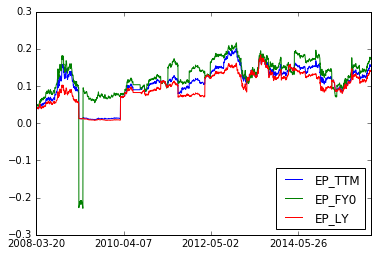

In [263]:
f_ep = f_price[['marketValue']]

f_ep = f_ep.join(f_earning[['Q', 'TTM', 'FY0', 'LY']], how='outer')
f_ep = f_ep.ffill().dropna()

f_ep.rename(columns = {'marketValue' : 'MV'}, inplace=True)

f_ep['EP_TTM'] = f_ep['TTM'] / f_ep['MV']
f_ep['EP_FY0'] = f_ep['FY0'] / f_ep['MV']
f_ep['EP_LY'] = f_ep['LY'] / f_ep['MV']
#f_ep['PE_TTM'] = 1/f_ep['EP_TTM']
f_ep[['EP_TTM', 'EP_FY0', 'EP_LY']].plot()

### encapsulate a function
create a function to automatically download and calculate these factors

In [216]:
### get value factors
#1. cash flow to pride: CTOP
#2. EBITToTOR : EBIT to Total Operating Revenue
#3. ETOP : Earning to Price (inverse of PE)
#4. PB, PCF, PE, PS
#5. TA2EV, CFO2EV : Total Asset to Enterprise Value, and Cash Flow Operating to EV
#6. CashRateOfSales: CF Operating net vs. Salesb
factors = base.getFactorData(ticker, 'CTOP,EBITToTOR,ETOP,PB,PCF,PE,PS,TA2EV,CFO2EV,CashRateOfSales', \
    beginDate, endDate) # CTOP: cash flow to price, CTP5: 5y avg cash flow to price
factors

,CFO2EV,CTOP,CashRateOfSales,EBITToTOR,ETOP,PB,PCF,PE,PS,TA2EV
date,,,,,,,,,,
2008-01-02,0.2436,NaN,2.2770,0.3470,0.0253,10.4147,4.1055,39.5174,9.3481,3.9094
2008-01-03,0.2477,NaN,2.2770,0.3470,0.0257,10.2419,4.0374,38.8619,9.1931,3.9754
2008-01-04,0.2411,NaN,2.2770,0.3470,0.0250,10.5216,4.1476,39.9232,9.4441,3.8697
2008-01-07,0.2362,NaN,2.2770,0.3470,0.0245,10.7410,4.2341,40.7555,9.6410,3.7907
2008-01-08,0.2290,NaN,2.2770,0.3470,0.0238,11.0755,4.3660,42.0249,9.9413,3.6762
2008-01-09,0.2250,NaN,2.2770,0.3470,0.0234,11.2730,4.4438,42.7741,10.1185,3.6118
2008-01-10,0.2205,NaN,2.2770,0.3470,0.0229,11.5033,4.5346,43.6481,10.3253,3.5395
2008-01-11,0.2099,NaN,2.2770,0.3470,0.0218,12.0874,4.7649,45.8643,10.8496,3.3684
2008-01-14,0.2129,NaN,2.2770,0.3470,0.0221,11.9146,4.6968,45.2088,10.6945,3.4173


In [ ]:
factors.sort_index(inplace=True)
factors['Sales2EV'] = factors['CFO2EV'] / factors['CashRateOfSales']
factors['Sales2EV'].plot()

In [ ]:
### get fundamental values
#1. Net Cash Flow Operating
funda = pd.DataFrame()

f1 = base.getFundamental(form_cf, ticker, 'fiscalPeriod,NCFOperateA', beginDate, endDate)
f1.sort_index(inplace=True)

/api/fundamental/getFdmtISAllLatest.json?secID=&ticker=000002&beginDate=&endDate=&field=&reportType=
200


KeyError: 'data'

In [35]:
## create Earning data
f_earning = f1[['publishDate', 'reportType', '']]
#f1.drop_duplicates(['date', 'reportType'])
f1.drop_duplicates(inplace=True)
f1

/Users/jianboxue/anaconda/lib/python2.7/site-packages/pandas/util/decorators.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return func(*args, **kwargs)


,AJInvestIncome,COGS,NIncome,NIncomeAttrP,NoperateExp,NoperateIncome,TCogs,TComprIncome,TProfit,accoutingStandards,...,operateProfit,othComprIncome,partyID,publishDate,reportType,revenue,secID,secShortName,tRevenue,ticker
date,,,,,,,,,,,,,,,,,,,,,
2008-03-31,NaN,2176919000,1004182000,1004182000,1791000,4545000,2176919000,NaN,1379105000,,...,1376351000,NaN,2,2008-04-24,Q1,3553270000,000001.XSHE,平安银行,3553270000,000001
2008-03-31,NaN,2176920000,1004182000,1004182000,1791000,4545000,2176920000,NaN,1379105000,,...,1376351000,NaN,2,2009-04-24,Q1,3553270000,000001.XSHE,平安银行,3553270000,000001
2008-06-30,4754000,4274257000,2143834000,2143834000,28439000,13111000,4274257000,2131781000,2825668000,,...,2840996000,-12053000,2,2009-08-21,S1,7115253000,000001.XSHE,平安银行,7115253000,000001
2008-06-30,4754000,4274257000,2143834000,2143834000,28439000,13111000,4274257000,NaN,2825668000,,...,2840996000,NaN,2,2008-08-21,S1,7115253000,000001.XSHE,平安银行,7115253000,000001
2008-09-30,NaN,2102946000,1173160000,1173160000,49887000,15680000,2102946000,NaN,1489001000,,...,1523208000,NaN,2,2008-10-24,Q3,3626154000,000001.XSHE,平安银行,3626154000,000001
2008-09-30,NaN,6377202000,3316994000,3316994000,78326000,28791000,6377202000,NaN,4314669000,,...,4364204000,NaN,2,2008-10-24,CQ3,10741406000,000001.XSHE,平安银行,10741406000,000001
2008-09-30,NaN,2102946000,1173160000,1173160000,49887000,15680000,2102946000,1431695000,1489001000,,...,1523208000,258535000,2,2009-10-29,Q3,3626154000,000001.XSHE,平安银行,3626154000,000001
2008-09-30,NaN,6377202000,3316994000,3316994000,78326000,28791000,6377202000,3563476000,4314669000,,...,4364204000,246482000,2,2009-10-29,CQ3,10741406000,000001.XSHE,平安银行,10741406000,000001
2008-12-31,22675000,13709693000,614035000,614035000,63127000,52310000,13709693000,NaN,792609000,,...,803426000,NaN,2,2009-03-20,A,14513119000,000001.XSHE,平安银行,14513119000,000001


In [ ]:
funda2 = base.getFundamental(form_earning_report, ticker, 'fiscalPeriod,revenue', beginDate, endDate)

In [ ]:
funda['CFO_Q'] = funda['NCFOperateA']
funda['CFO_TTM'] = pd.rolling_sum(funda['CFO_Q'], 4)

funda = funda.join(factors[['CFO2EV']], how='outer')
funda.drop_duplicates(inplace=True)
funda.fillna(axis=0, method='ffill', inplace=True)

funda['EV'] = funda['CFO_TTM'] / funda['CFO2EV']

In [ ]:
funda2

In [ ]:
factors

In [ ]:
funda

In [ ]:
results = pd.DataFrame()
mktcap = base.getMarketEqu(ticker, 'marketValue', beginDate, endDate) # total market cap
ncfo = base.getFundamental(ticker, 'NCFOperateA', beginDate, endDate) # net cashflow of operational

results = results.join(mktcap, how='outer')
results = results.join(ncfo, how='outer')

print results.dropna()

In [ ]:
ticker = '600035'
base.getEquityDiv(ticker, 'perShareDivRatio,perShareTransRatio,perCashDiv',beginDate, endDate)